In [503]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import statsmodels.api as sm

In [370]:
df_trashepatico= pd.read_excel("/content/Trasplante hepático consolidado.xlsx")

In [371]:
#Imprimir las dimensiones del dataset
print(f"Las dimensiones del dataframe son\n: {df_trashepatico.shape}")

Las dimensiones del dataframe son
: (736, 285)


In [372]:
pd.set_option('display.max_rows', None)
df_trashepatico.dtypes

,0
#_Paciente,int64
Año_Tx,int64
Mes_Tx#1,int64
Fecha_Tx,datetime64[ns]
Edad_Al_Tx,float64
Sexo_Receptor,int64
Código de anonimización,object
Fecha_nacimiento,object
EPS,float64
Grupo_Sanguíneo_Receptor,object


In [373]:
#análisis de datos pérdidos en el dataset
pd.set_option('display.max_rows', None)
df_trashepatico.isnull().sum()

,0
#_Paciente,0
Año_Tx,0
Mes_Tx#1,0
Fecha_Tx,0
Edad_Al_Tx,0
Sexo_Receptor,0
Código de anonimización,0
Fecha_nacimiento,1
EPS,2
Grupo_Sanguíneo_Receptor,7


In [374]:
#mira cuáles de las filas están completas #De acuerdo con lo que se observa no hay filas que estén totalmente completas
df_trashepatico.notnull().all(axis=1).sum()

np.int64(0)

In [375]:
#mostrar duplicados
print(f'Duplicados:{df_trashepatico.duplicated().sum()}')
print(f'Duplicados %:{df_trashepatico.duplicated().sum()/len(df_trashepatico)}')


Duplicados:0
Duplicados %:0.0


In [376]:
categoricas = [
    'Mes_Tx#1', 'Sexo_Receptor', 'EPS', 'Grupo_Sanguíneo_Receptor',
    'RH_Receptor', 'COD_Grupo_Sanguíneo_Receptor', 'COD_RH_Receptor',
    'Causa_1_Tx_Hepático_', 'Causa_2_Tx_Hepático_', 'Hepatocarcinoma',
    'Child_Pugh_Letra', 'MELD_Score', 'Falla_Cardiaca_Pre_Tx',
    'Enfermedad_Coronaria_Pre_Tx', 'Infarto_Cardiaco_Pre_Tx',
    'Diabetes_Mellitus_Pre_Tx', 'Hipertensión_Arterial_Pre_Tx',
    'Antecedente_De_Alcoholismo', 'MDRD_Categórico_PreTx', 'CMV_Receptor',
    'EKG_PreQx_Valor', 'Ecocardiograma_PreQx-FE_Cod', 'Ecocardiograma_PreQx_RC',
    'Ecocardiograma_PreQx_Hipertensión_Pulmonar', 'Ecocardiograma_PreQx_Disfunción_Diastólica',
    'METS', 'Sexo_Donante_Tx#1', 'Causa_Muerte_Donante_Tx#1', 'CMV_Donante_Tx#1',
    'Tipo_de_Cx-Trasplante_Tx#1', 'Trasplante_Combinado-Hígado-Riñón_Tx#1', 'Injerto_Aórtico_Tx#1',
    'Antibiótico_Profiláctico_VS_Terapéutico', 'Antibiótico_1__Tx#1', 'Antifúngico_Tx#1', 'Soporte_Vasopresor_PeriTx', 'Noradrenalina_PeriTx', 'Vasopresina_PeriTx',
    'Amiodarona_PeriTx', 'COD_Bilirrubina_Directa',
    '¿Complicación?', 'Tipo_De_Complicación_1', 'Inmunosupresor_1',
    'Inmunosupresor_2', 'Inmunosupresión_con_Anticuerpos', 'Rechazo_Agudo',
    'Severidad_Rechazo_Agudo', 'Rechazo_Crónico', 'Infección_POP',
    'Tipo_Infección_1', 'Germen_1', 'Tipo_Infección_2', 'Germen_2', 'Germen_3',
    'Stent', 'Requirió_Reconstrucción_Biliar', 'Profilaxis_Antitrombótica',
    'Medicamento_Antitrombótica', 'Falla_Cardiaca_POP', 'Arritmia_POP',
    'Infarto_POP', 'Retrasplante', 'Indicación_Retrasplante', 'Mes_Tx#2',
    'Días_Desde_Tx#1', 'Edad_Donante_Tx#2', 'Causa_Muerte_Donante_Tx#2',
    'Tipo_de_Cx-Trasplante_Tx#2',
    'Injerto_Aórtico_Tx#2', 'Antibiótico_1_Tx#2', 'Antibiótico_2_Tx#2',
    'Antibiótico_3_Tx#2', 'Antifúngico_Tx#2', 'Re_Re trasplante', 'Indicación_Re_Re_trasplante', 'Mes_Tx#3',
    'Sexo_Donante_Tx#3', 'Causa_Muerte_Donante_Tx#3', 'CMV_Donante_Tx#3',
    'Tipo_de_Cx-Trasplante_Tx#3', 'Fast_Track', 'Vivo_Hoy',
    'Causa_De_Muerte', 'Sobrevida_Injerto_#1', 'Sobrevida_Injerto_#2',
    'Sobrevida_Injerto_#3', 'PTLD', 'Neoplasia_PostTx', 'Cumple_Milán',
    'Cumple_UCSF', 'Cumple_Up_To_Seven', 'Terapia_Local_1', 'Terapia_Local_2',
    'PLR', 'PREMORAL_Categoría', 'Patrón_Histológico', 'Grado_HCC',
    'Invasión_Vascular','Invasión_Linfática',
    'Invasión_Nerviosa', 'Necrosis_Tumoral', 'Ki67', 'Mitosis', 'p53',
    'T', 'N', 'M', 'Estadio', 'COMBOMORAL_Categoría',
    'Lugar_De_Recurrencia', 'Causa_Tx_Renal', 'Composición_Corporal','Antecedente_De_Tabaquismo', 'Dislipidemia_Pre_Tx', 'Complicación_Asociada',
    '¿Complicación?'
    ]
numericas = [
    'Edad_Al_Tx', 'Tiempo_En_Lista_Días', 'Tiempo_En_Lista_Meses',
    'Tiempo_En_Lista_Años', 'Peso_Pre_Tx', 'BMI',
    'Colesterol_TotalPre_Tx', 'LDL_Pre_Tx', 'HDL_Pre_Tx', 'Triglicéridos_Pre_Tx',
    'Dislipidemia_Pre_Tx', 'MDRD_Score_Pre_Tx', 'Ecocardiograma_PreQx_FE%',
    'Ecocardiograma_PreQx_RC%', 'Ecocardiograma_PreQxPSAP', 'Ecocardiograma_PreQx_TASVE',
    'Edad_Donante_Tx#1', 'Tiempo_Isquemia_Fría_Tx#1',
    'Tiempo_Isquemia_Caliente_Tx#1', '#_Unidades_Glóbulos_Rojos_Tx#1',
    '#_Unidades_Crioprecipitados_Tx#1', 'Días_Tratamiento_Antibiótico_Previo_A_Tx#1',
    'Tiempo_De_Dosis_Hasta_Tx#1', 'Tiempo_Sonda_Vesical', 'Tiempo_CVC',
    'Levosimendam_Dosis', 'Noradrenalina_Dosis', 'Andrenalina_Dois',
    'Vasopresina_Dosis', 'Dopamina_PeriTx', 'Amiodarona_Dosis',
    'Tx_Soporte_Inotrópico', 'Bilirrubina_Total_POP', 'Bilirrubina_Directa_POP',
    '#_De_Complicaciones', 'Tiempo_Desde_Tx_Infección_1',
    'Tiempo_Desde_Tx_Infección_2', 'Tiempo_Desde_Tx_Infección_3',
    'Tiempo_Reconstrucción_Biliar', 'Días_de_Profilaxis_Antitrombótica',
    'EKG_VALOR_POP', 'Ecocardiograma_POP_FE%', 'Días_Reenlistado_Tx#2',
    'Sexo_Donante_Tx#2', 'Tiempo_Isquemia_Fría_Tx#2',
    'Tiempo_Isquemia_Caliente_Tx#2', '#_Unidades_Glóbulos_Rojos_Tx#2',
    '#_Unidades_Plasma_Fresco_Congelado_Tx#2', '#_Unidades_Crioprecipitados_Tx#2',
    '#_Unidades_Plaquetas_Tx#2', 'Días_Reenlistado_Tx#3', 'Días_Desde_Tx#1',
    'Edad_Donante_Tx#3', 'Tiempo_Isquemia_Fría_Tx#3', 'Tiempo_Isquemia_Caliente_Tx#3',
    '#_Unidades_Glóbulos_Rojos_Tx#3', '#_Unidades_Plasma_Fresco_Congelado_Tx#3',
    '#_Unidades_Crioprecipitados_Tx#3', '#_Unidades_Plaquetas_Tx#3',
    'Tiempo_Quirúrgico_Tx#3', 'Días_En_UCI', 'Días_En_Hospitalización_Piso',
    'Días_Totales_Intrahospitalarios', 'Sobrevida_Días', 'Sobrevida_Meses',
    'Sobrevida_Años',
    'Días_Sobrevida_Injerto_#1', 'Meses_Sobrevida_Injerto_#1',
    'Años_Sobrevida_Injerto_#1', 'Días_Sobrevida_Injerto_#2',
    'Meses_Sobrevida_Injerto_#2', 'Años_Sobrevida_Injerto_#2',
    'Días_Sobrevida_Injerto_#3', 'Meses_Sobrevida_Injerto_#3',
    'Años_Sobrevida_Injerto_#3', 'Tiempo_Tx_A_PTLD',
    'Tiempo_Tx_A_Neoplasia_PostTx', 'αFP_Al_Dx', '#_Nódulos_Al_Dx',
    'Diámetro_Nódulo_Principal_(cm)_Al_Dx',
    'Sumatoria_#Nódulos_y_Diámetros_Al_Dx', '#_Sesiones', 'αFP_PreTx',
     'Neutrófilos_PreTx', 'Plaquetas_PreTx', 'Linfocitos_PreTx',
    'PREMORAL_Valor', '#Nódulos_Viables',
    'Diámetro_Tumor_Viable_Más_Grande_Patología',
    'Sumatoria_Nódulos_Viables_y_Diámetro_Tumor_Más_Grande_Patología',
    'αFP_1m_PostTx', 'POSTMORAL_Valor', 'RETREAT_Valor', 'COMBOMORAL_Valor',
    'αFP_6m_PostTx', 'αFP_1año_PostTx'
  ]

fechas = [
    'Fecha_Tx', 'Fecha_nacimiento', 'Fecha-Enlistamiento',
    'Fecha_Colocación_Sonda_Vesical', 'Fecha_Retiro_Sonda_Vesical',
    'Fecha_Colocación_CVC', 'Fecha_Retiro_CVC', 'Fecha_Infección_1',
    'Fecha_Infección_2', 'Fecha_Infección_3',
    'Fecha_Reconstrucción_Biliar', 'Fecha-Enlistamiento_Tx#2',
    'Fecha_Tx#2', 'Tiempo_Quirúrgico_Tx#2', 'Días_Tratamiento_Antibiótico_Previo_A_Tx#2',
    'Tiempo_De_Dosis_Hasta_Tx#2', 'Fecha-Enlistamiento_Tx#3', 'Fecha_Tx#3',
    'Fecha_Egreso_Hospitalario', 'Fecha_Control/Muerte',
    'Último_Análisis_De_Mortalidad', 'Control_Injerto_#1', 'Control_Injerto_#2',
    'Control_Injerto_#3', 'Fecha_Tx_A_PTLD', 'Fecha_Neoplasia_PostTx', 'Fecha_Recurrencia'
  ]

In [377]:
for col in categoricas:
    if col in df_trashepatico.columns:
        df_trashepatico[col] = df_trashepatico[col].astype('category')

for col in numericas:
    if col in df_trashepatico.columns:
        df_trashepatico[col] = (
            df_trashepatico[col]
            .astype(str)
            .str.replace(',', '.', regex=False)
        )
        df_trashepatico[col] = pd.to_numeric(df_trashepatico[col], errors='coerce')

In [378]:
df_trashepatico[fechas] = df_trashepatico[fechas].apply(
    pd.to_datetime, errors='coerce', dayfirst=True, infer_datetime_format=True
)

/tmp/ipython-input-2440740876.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df_trashepatico[fechas] = df_trashepatico[fechas].apply(
/tmp/ipython-input-2440740876.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df_trashepatico[fechas] = df_trashepatico[fechas].apply(
/tmp/ipython-input-2440740876.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove 

In [379]:
df_trashepatico.dtypes

,0
#_Paciente,int64
Año_Tx,int64
Mes_Tx#1,category
Fecha_Tx,datetime64[ns]
Edad_Al_Tx,float64
Sexo_Receptor,category
Código de anonimización,object
Fecha_nacimiento,datetime64[ns]
EPS,category
Grupo_Sanguíneo_Receptor,category


In [380]:
#mostrar las categorias de las categoricas ya que hay varias que toca corregir
for col in categoricas:
    print(f"\n {col}")
    print(df_trashepatico[col].unique())


 Mes_Tx#1
[6, 1, 10, 9, 3, ..., 7, 12, 11, 2, 8]
Length: 12
Categories (12, int64): [1, 2, 3, 4, ..., 9, 10, 11, 12]

 Sexo_Receptor
[2, 1]
Categories (2, int64): [1, 2]

 EPS
[9999.0, 3.0, 1.0, 2.0, 13.0, ..., 32.0, 31.0, NaN, 37.0, 0.0]
Length: 38
Categories (37, float64): [0.0, 1.0, 2.0, 3.0, ..., 33.0, 34.0, 37.0, 9999.0]

 Grupo_Sanguíneo_Receptor
[9999, 'O', 'B', 'A', 'AB', 'O ', 0, 'A2', 'A1', NaN]
Categories (9, object): [0, 9999, 'A', 'A1', ..., 'AB', 'B', 'O', 'O ']

 RH_Receptor
[9999, '(+)', '(-)', '(+)(-)', NaN]
Categories (4, object): [9999, '(+)', '(+)(-)', '(-)']

 COD_Grupo_Sanguíneo_Receptor
[9999.0, 1.0, 3.0, 2.0, 4.0, NaN]
Categories (5, float64): [1.0, 2.0, 3.0, 4.0, 9999.0]

 COD_RH_Receptor
[9999.0, 1.0, 2.0, 12.0, NaN]
Categories (4, float64): [1.0, 2.0, 12.0, 9999.0]

 Causa_1_Tx_Hepático_
[23.0, 14.0, 8.0, 9.0, 12.0, ..., 26.0, 27.0, NaN, 15.0, 28.0]
Length: 28
Categories (27, float64): [1.0, 2.0, 3.0, 4.0, ..., 25.0, 26.0, 27.0, 28.0]

 Causa_2_Tx_Hepático_


#Limpieza de datos

In [381]:
#Limpieza primeras variables
df_limpiezaL = df_trashepatico[['Año_Tx', 'Mes_Tx#1','Edad_Al_Tx', 'Sexo_Receptor', 'EPS', 'Tiempo_En_Lista_Días', 'Tiempo_En_Lista_Años', 'Tiempo_En_Lista_Meses', 'Causa_1_Tx_Hepático_',
'Causa_2_Tx_Hepático_', 'Hepatocarcinoma', 'Child_Pugh_Letra', 'MELD_Score', 'Causa_Tx_Renal', 'Peso_Pre_Tx', 'BMI', 'Composición_Corporal', 'Falla_Cardiaca_Pre_Tx', 'Enfermedad_Coronaria_Pre_Tx',
'Infarto_Cardiaco_Pre_Tx','Diabetes_Mellitus_Pre_Tx', 'Hipertensión_Arterial_Pre_Tx', 'Antecedente_De_Tabaquismo', 'Antecedente_De_Alcoholismo','Colesterol_TotalPre_Tx','LDL_Pre_Tx','HDL_Pre_Tx','Triglicéridos_Pre_Tx',
'Dislipidemia_Pre_Tx', 'MDRD_Categórico_PreTx', 'Complicación_Asociada','¿Complicación?']]


In [382]:
df_limpiezaL.shape
df_limpiezaL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Año_Tx                        736 non-null    int64   
 1   Mes_Tx#1                      736 non-null    category
 2   Edad_Al_Tx                    736 non-null    float64 
 3   Sexo_Receptor                 736 non-null    category
 4   EPS                           734 non-null    category
 5   Tiempo_En_Lista_Días          736 non-null    int64   
 6   Tiempo_En_Lista_Años          736 non-null    float64 
 7   Tiempo_En_Lista_Meses         736 non-null    float64 
 8   Causa_1_Tx_Hepático_          729 non-null    category
 9   Causa_2_Tx_Hepático_          730 non-null    category
 10  Hepatocarcinoma               730 non-null    category
 11  Child_Pugh_Letra              716 non-null    category
 12  MELD_Score                    712 non-null    cate

Se miran los datos nulos, sin embargo, esto solo arroja como los espacios en blanco que se tienen en cada variable

In [383]:
df_limpiezaL.isnull().sum()

,0
Año_Tx,0
Mes_Tx#1,0
Edad_Al_Tx,0
Sexo_Receptor,0
EPS,2
Tiempo_En_Lista_Días,0
Tiempo_En_Lista_Años,0
Tiempo_En_Lista_Meses,0
Causa_1_Tx_Hepático_,7
Causa_2_Tx_Hepático_,6


Esta tabla muestra los 9999 de la base, ya que se presenta un gran número de casillas con este valor. Adicional se hace un recuento de los datos nulos de las variables.

In [384]:
resumen_9999 = pd.DataFrame({
    'Count 9999': (df_limpiezaL == 9999).sum(),
    'Percent': ((df_limpiezaL == 9999).sum() / len(df_limpiezaL)) * 100,
    'Count null': df_limpiezaL.isnull().sum(),
    'Percent null': (df_limpiezaL.isnull().sum() / len(df_limpiezaL)) * 100,
    'sum NHD': ((df_limpiezaL == 9999).sum() + df_limpiezaL.isnull().sum()),
    'Variable type': df_limpiezaL.dtypes
})
print(resumen_9999)

                              Count 9999    Percent  Count null  Percent null  \
Año_Tx                                 0   0.000000           0      0.000000   
Mes_Tx#1                               0   0.000000           0      0.000000   
Edad_Al_Tx                             0   0.000000           0      0.000000   
Sexo_Receptor                          0   0.000000           0      0.000000   
EPS                                   32   4.347826           2      0.271739   
Tiempo_En_Lista_Días                  31   4.211957           0      0.000000   
Tiempo_En_Lista_Años                  31   4.211957           0      0.000000   
Tiempo_En_Lista_Meses                 31   4.211957           0      0.000000   
Causa_1_Tx_Hepático_                   0   0.000000           7      0.951087   
Causa_2_Tx_Hepático_                   0   0.000000           6      0.815217   
Hepatocarcinoma                        0   0.000000           6      0.815217   
Child_Pugh_Letra            

#Importante
En cuanto a limpieza las variables como: Año de trasplante, mes de trasplante, edad al trasplante y el sexo, no requieren limpieza

In [385]:
#con este codigo se reemplazan todas los valores 9999 de las variables númericas en NaN
num_cols = df_limpiezaL.select_dtypes(include=['number']).columns
df_limpiezaL.loc[:, num_cols] = df_limpiezaL[num_cols].astype('float64')
df_limpiezaL.loc[:, num_cols] = df_limpiezaL[num_cols].replace(9999, np.nan)

/tmp/ipython-input-2253141740.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan 5.2000e+01 4.0000e+01 2.3000e+01 1.2600e+02 1.5000e+02
 6.8000e+01 1.4000e+01 1.7000e+02 7.8000e+01 1.1100e+02 1.6800e+02
 1.4000e+01 3.5100e+02 5.2000e+01 3.2000e+01 3.3000e+01 1.6400e+02
 4.3000e+01 2.2300e+02 4.2200e+02 1.0300e+02 1.1800e+02 2.9000e+01
 3.1000e+01 9.9000e+01 4.4400e+02 1.5100e+02 1.9000e+01 1.6400e+02
 2.4000e+01 2.8500e+02 9.6000e+01 9.1000e+01 6.7000e+01 2.0000e+00
 6.5000e+01 2.3000e+02 1.0000e+00 2.2000e+01 2.7100e+02 6.9000e+01
 4.0000e+01 2.4000e+01 6.0000e+00 2.4400e+

In [386]:
#Se reemplazan los 9999 de las variables categóricas
for col in df_limpiezaL.select_dtypes(['category']).columns:
    if col != 'Causa_Tx_Renal':
        df_limpiezaL.loc[:, col] = (df_limpiezaL[col].cat.add_categories(['NHD']).fillna('NHD').replace([9999, '9999'], 'NHD'))

/tmp/ipython-input-3324197175.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[6, 1, 10, 9, 9, ..., 2, 3, 3, 3, 3]
Length: 736
Categories (13, object): [1, 2, 3, 4, ..., 10, 11, 12, 'NHD']' has dtype incompatible with category, please explicitly cast to a compatible dtype first.
  df_limpiezaL.loc[:, col] = (df_limpiezaL[col].cat.add_categories(['NHD']).fillna('NHD').replace([9999, '9999'], 'NHD'))
/tmp/ipython-input-3324197175.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[2, 1, 2, 2, 2, ..., 2, 2, 1, 1, 1]
Length: 736
Categories (3, object): [1, 2, 'NHD']' has dtype incompatible with category, please explicitly cast to a compatible dtype first.
  df_limpiezaL.loc[:, col] = (df_limpiezaL[col].cat.add_categories(['NHD']).fillna('NHD').replace([9999, '9999'], 'NHD'))
/tmp/ipython-input-3324197175.py:4: FutureWarning: The behavior of Se

In [387]:
resumen_9999 = pd.DataFrame({
    'Count 9999': (df_limpiezaL == 9999).sum(),
    'Percent': ((df_limpiezaL == 9999).sum() / len(df_limpiezaL)) * 100,
    'Count null': df_limpiezaL.isnull().sum(),
    'Percent null': (df_limpiezaL.isnull().sum() / len(df_limpiezaL)) * 100,
    'sum NHD': ((df_limpiezaL == 9999).sum() + df_limpiezaL.isnull().sum()),
    'Variable type': df_limpiezaL.dtypes
})
print(resumen_9999)

                              Count 9999    Percent  Count null  Percent null  \
Año_Tx                                 0   0.000000           0      0.000000   
Mes_Tx#1                               0   0.000000           0      0.000000   
Edad_Al_Tx                             0   0.000000           0      0.000000   
Sexo_Receptor                          0   0.000000           0      0.000000   
EPS                                    0   0.000000           0      0.000000   
Tiempo_En_Lista_Días                   0   0.000000          31      4.211957   
Tiempo_En_Lista_Años                   0   0.000000          31      4.211957   
Tiempo_En_Lista_Meses                  0   0.000000          31      4.211957   
Causa_1_Tx_Hepático_                   0   0.000000           0      0.000000   
Causa_2_Tx_Hepático_                   0   0.000000           0      0.000000   
Hepatocarcinoma                        0   0.000000           0      0.000000   
Child_Pugh_Letra            

#Causa_1_Tx_Hepático_ / Causa_2_Tx_Hepático_/Hepatocarcinoma/

In [388]:
df_limpiezaL['Causa_1_Tx_Hepático_'].value_counts()

,count
Causa_1_Tx_Hepático_,
3.0,155
4.0,113
1.0,106
8.0,92
9.0,71
11.0,40
12.0,38
23.0,22
10.0,15


In [389]:
df_limpiezaL['Causa_2_Tx_Hepático_'].value_counts()

,count
Causa_2_Tx_Hepático_,
0.0,705
3.0,7
4.0,7
NHD,6
2.0,3
15.0,2
21.0,2
11.0,1
9.0,1


In [390]:
df_limpiezaL['Hepatocarcinoma'].value_counts()

,count
Hepatocarcinoma,
0.0,557
1.0,173
NHD,6


#Child Child_Pugh_Letra

In [391]:
#Esta variable solo tiene 4 niveles: 0, no aplica; 1, A; 2, B; 3, C
df_limpiezaL['Child_Pugh_Letra'].value_counts()

,count
Child_Pugh_Letra,
B,354
C,168
A,128
NHD,54
2,15
3,11
1,3
0,2
B,1


In [392]:
df_limpiezaL['Child_Pugh_Letra'] = (
    df_limpiezaL['Child_Pugh_Letra']
    .astype(str).str.strip()   # limpia espacios invisibles que hay en letras
    .replace({
        'A': '1',
        'B': '2',
        'C': '3'
    })
)


/tmp/ipython-input-3901219774.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpiezaL['Child_Pugh_Letra'] = (


In [393]:
df_limpiezaL['Child_Pugh_Letra'].value_counts()

,count
Child_Pugh_Letra,
2,370
3,179
1,131
NHD,54
0,2


#MELD_score

In [394]:
df_limpiezaL['MELD_Score'] = (df_limpiezaL['MELD_Score'].replace(57, 40))
df_limpiezaL['MELD_Score'] = (df_limpiezaL['MELD_Score'].replace(0, np.nan))

/tmp/ipython-input-1819679019.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df_limpiezaL['MELD_Score'] = (df_limpiezaL['MELD_Score'].replace(57, 40))
/tmp/ipython-input-1819679019.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpiezaL['MELD_Score'] = (df_limpiezaL['MELD_Score'].replace(57, 40))
/tmp/ipython-input-1819679019.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories.

In [395]:
df_limpiezaL['MELD_Score'] = pd.to_numeric(df_limpiezaL['MELD_Score'], errors='coerce')
df_limpiezaL['MELD_Score'].describe()

/tmp/ipython-input-1889925250.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpiezaL['MELD_Score'] = pd.to_numeric(df_limpiezaL['MELD_Score'], errors='coerce')


,MELD_Score
count,645.000000
mean,16.708527
std,5.991091
min,6.000000
25%,12.000000
50%,16.000000
75%,22.000000
max,40.000000


#Causa_Tx_Renal
Esta variable indica que de 1 a 6 indica que hubo trasplante combinado. 9999 no fue trasplante combinado

In [396]:
df_limpiezaL['Causa_Tx_Renal'].value_counts()

,count
Causa_Tx_Renal,
9999.0,660
0.0,21
1.0,6
6.0,6
3.0,6
5.0,4
2.0,2
4.0,1
20.0,1


In [397]:
df_limpiezaL['Causa_Tx_Renal'].replace([0,20], 'NHD', inplace=True)
df_limpiezaL['Causa_Tx_Renal'].replace(9999, 0, inplace=True)
df_limpiezaL['Causa_Tx_Renal'].value_counts()

/tmp/ipython-input-909765252.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_limpiezaL['Causa_Tx_Renal'].replace([0,20], 'NHD', inplace=True)
/tmp/ipython-input-909765252.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df_limpiezaL['Causa_Tx_Renal'].replace([0,20], 'NHD', inplace=True)
/tmp/ipython-input-

,count
Causa_Tx_Renal,
0,660
NHD,22
3.0,6
1.0,6
6.0,6
5.0,4
2.0,2
4.0,1


#BMI

In [398]:
df_limpiezaL['BMI'] = (df_limpiezaL['BMI'].replace(0, np.nan))

/tmp/ipython-input-2419435647.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpiezaL['BMI'] = (df_limpiezaL['BMI'].replace(0, np.nan))


In [399]:
df_limpiezaL['BMI'].describe()

,BMI
count,594.000000
mean,25.262449
std,4.548209
min,13.200000
25%,22.000000
50%,24.950000
75%,28.075000
max,42.000000


#Composición_corporal

In [400]:
df_limpiezaL['Composición_Corporal'].value_counts()

,count
Composición_Corporal,
1.0,260
2.0,208
NHD,127
3.0,71
0.0,55
4.0,14
5.0,1


In [401]:
def clasificar_bmi(bmi):
    if pd.isna(bmi):
        return np.nan
    elif bmi < 18.5:
        return 0
    elif bmi < 25:
        return 1
    elif bmi < 30:
        return 2
    elif bmi < 35:
        return 3
    elif bmi < 40:
        return 4
    else:
        return 5
mask_restaurar_nhd = df_limpiezaL['Composición_Corporal'].isna() & df_limpiezaL['BMI'].isna()
df_limpiezaL.loc[mask_restaurar_nhd, 'Composición_Corporal'] = 'NHD'

mask_imputa = df_limpiezaL['Composición_Corporal'].isin(['NHD', '9999', 9999]) & df_limpiezaL['BMI'].notna()
df_limpiezaL.loc[mask_imputa, 'Composición_Corporal'] = (
    df_limpiezaL.loc[mask_imputa, 'BMI'].apply(clasificar_bmi)
)
df_limpiezaL['Composición_Corporal'] = df_limpiezaL['Composición_Corporal'].astype('category')

/tmp/ipython-input-1599648477.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpiezaL['Composición_Corporal'] = df_limpiezaL['Composición_Corporal'].astype('category')


In [402]:
df_limpiezaL['Composición_Corporal'].value_counts()

,count
Composición_Corporal,
1.0,264
2.0,212
NHD,117
3.0,73
0.0,55
4.0,14
5.0,1


#Falla_Cardiaca_Pre_Tx / Enfermedad_Coronaria_Pre_Tx / Infarto_Cardiaco_Pre_Tx /Diabetes_Mellitus_Pre_Tx

In [403]:
df_limpiezaL['Falla_Cardiaca_Pre_Tx'].replace('PERICARDITIS', 0, inplace=True)


/tmp/ipython-input-4050316785.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_limpiezaL['Falla_Cardiaca_Pre_Tx'].replace('PERICARDITIS', 0, inplace=True)
/tmp/ipython-input-4050316785.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df_limpiezaL['Falla_Cardiaca_Pre_Tx'].replace('PERICARDITIS', 0, inplace=T

In [404]:
df_limpiezaL['Enfermedad_Coronaria_Pre_Tx'] = (
    df_limpiezaL['Enfermedad_Coronaria_Pre_Tx']
    .replace(['ANGINA ESTABLE', 'ANGINA INESTABLE'], 1)
)

/tmp/ipython-input-2723294280.py:3: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  .replace(['ANGINA ESTABLE', 'ANGINA INESTABLE'], 1)
/tmp/ipython-input-2723294280.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpiezaL['Enfermedad_Coronaria_Pre_Tx'] = (


In [405]:
df_limpiezaL['Infarto_Cardiaco_Pre_Tx'] = (
    df_limpiezaL['Infarto_Cardiaco_Pre_Tx']
    .replace('BLOQUEO AV CON MARCAPASOS', 0)
)

/tmp/ipython-input-767733407.py:3: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  .replace('BLOQUEO AV CON MARCAPASOS', 0)
/tmp/ipython-input-767733407.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpiezaL['Infarto_Cardiaco_Pre_Tx'] = (


In [487]:
df_limpiezaL['Diabetes_Mellitus_Pre_Tx'] = (
    df_limpiezaL['Diabetes_Mellitus_Pre_Tx']
    .replace(2, 'NHD')
)
df_limpiezaL['Diabetes_Mellitus_Pre_Tx'] = (
    df_limpiezaL['Diabetes_Mellitus_Pre_Tx']
    .replace('O', 0)
)

/tmp/ipython-input-1359146606.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpiezaL['Diabetes_Mellitus_Pre_Tx'] = (
/tmp/ipython-input-1359146606.py:7: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  .replace('O', 0)
/tmp/ipython-input-1359146606.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versu

In [407]:
df_limpiezaL['Hipertensión_Arterial_Pre_Tx'] = (
    df_limpiezaL['Hipertensión_Arterial_Pre_Tx']
    .replace('O', 0)
)

/tmp/ipython-input-3348666089.py:3: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  .replace('O', 0)
/tmp/ipython-input-3348666089.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpiezaL['Hipertensión_Arterial_Pre_Tx'] = (


#Colesterol_TotalPre_Tx / LDL_Pre_Tx / HDL_Pre_Tx / Triglicéridos_Pre_Tx

In [408]:
df_limpiezaL['Colesterol_TotalPre_Tx'].replace(0, np.nan, inplace=True)

/tmp/ipython-input-2884375338.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_limpiezaL['Colesterol_TotalPre_Tx'].replace(0, np.nan, inplace=True)
/tmp/ipython-input-2884375338.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpiezaL['Colesterol_TotalPre_Tx'].replace(0, np.nan, inplace=True)


In [409]:
df_limpiezaL['LDL_Pre_Tx'].replace(0, np.nan, inplace=True)

/tmp/ipython-input-3112167017.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_limpiezaL['LDL_Pre_Tx'].replace(0, np.nan, inplace=True)
/tmp/ipython-input-3112167017.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpiezaL['LDL_Pre_Tx'].replace(0, np.nan, inplace=True)


In [410]:
df_limpiezaL['HDL_Pre_Tx'].replace(0, np.nan, inplace=True)

/tmp/ipython-input-3454873275.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_limpiezaL['HDL_Pre_Tx'].replace(0, np.nan, inplace=True)
/tmp/ipython-input-3454873275.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpiezaL['HDL_Pre_Tx'].replace(0, np.nan, inplace=True)


In [411]:
df_limpiezaL['Triglicéridos_Pre_Tx'].replace(0, np.nan, inplace=True)

/tmp/ipython-input-303020410.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_limpiezaL['Triglicéridos_Pre_Tx'].replace(0, np.nan, inplace=True)
/tmp/ipython-input-303020410.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpiezaL['Triglicéridos_Pre_Tx'].replace(0, np.nan, inplace=True)


#Dislipidemia_Pre_Tx/MDRD_Categórico_PreTx

In [412]:
df_limpiezaL['Dislipidemia_Pre_Tx'] = (
    df_limpiezaL['Dislipidemia_Pre_Tx']
    .replace([258, 86, 172], 0)
)

/tmp/ipython-input-3315073405.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpiezaL['Dislipidemia_Pre_Tx'] = (


In [413]:
df_limpiezaL['Dislipidemia_Pre_Tx'] = (
    df_limpiezaL['Dislipidemia_Pre_Tx']
    .astype(object)
    .fillna('NHD')
    .astype('category')
)

/tmp/ipython-input-4247200785.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpiezaL['Dislipidemia_Pre_Tx'] = (


In [414]:
df_limpiezaL['MDRD_Categórico_PreTx'] = (
    df_limpiezaL['MDRD_Categórico_PreTx']
    .astype('object')  # evita choques con category
    .replace({18.59: 3, '18.59': 3, 999: 'NHD', '999': 'NHD'})
    .astype('category')
)

/tmp/ipython-input-3043522543.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpiezaL['MDRD_Categórico_PreTx'] = (


In [415]:
df_limpiezaL['MDRD_Categórico_PreTx'].value_counts()

,count
MDRD_Categórico_PreTx,
0.0,341
NHD,161
1.0,151
2.0,66
3.0,9
4.0,8


In [416]:
resumen_9999 = pd.DataFrame({
    'Count 9999': (df_limpiezaL == 9999).sum(),
    'Percent': ((df_limpiezaL == 9999).sum() / len(df_limpiezaL)) * 100,
    'Count null': df_limpiezaL.isnull().sum(),
    'Percent null': (df_limpiezaL.isnull().sum() / len(df_limpiezaL)) * 100,
    'sum NHD': ((df_limpiezaL == 9999).sum() + df_limpiezaL.isnull().sum()),
    'Variable type': df_limpiezaL.dtypes
})
print(resumen_9999)

                              Count 9999  Percent  Count null  Percent null  \
Año_Tx                                 0      0.0           0      0.000000   
Mes_Tx#1                               0      0.0           0      0.000000   
Edad_Al_Tx                             0      0.0           0      0.000000   
Sexo_Receptor                          0      0.0           0      0.000000   
EPS                                    0      0.0           0      0.000000   
Tiempo_En_Lista_Días                   0      0.0          31      4.211957   
Tiempo_En_Lista_Años                   0      0.0          31      4.211957   
Tiempo_En_Lista_Meses                  0      0.0          31      4.211957   
Causa_1_Tx_Hepático_                   0      0.0           0      0.000000   
Causa_2_Tx_Hepático_                   0      0.0           0      0.000000   
Hepatocarcinoma                        0      0.0           0      0.000000   
Child_Pugh_Letra                       0      0.0   

In [417]:
df_limpiezaL['Complicación_Asociada'].replace(['NO', 'N0', 'NINGUNA', 'NINGUNO', 'NIGNUNA', 'NADA'], np.nan, inplace=True)
df_limpiezaL['Complicación_Asociada'].replace(['99999', 99999], 'NHD')
df_limpiezaL['Complicación_Asociada'].value_counts()

/tmp/ipython-input-3108953677.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_limpiezaL['Complicación_Asociada'].replace(['NO', 'N0', 'NINGUNA', 'NINGUNO', 'NIGNUNA', 'NADA'], np.nan, inplace=True)
/tmp/ipython-input-3108953677.py:1: RuntimeWarning: '<' not supported between instances of 'datetime.datetime' and 'int', sort order is undefined for incomparable objects.
  df_limpiezaL['Complicación_Asociada'].replace(['NO', 'N0', 'NINGUNA', 'NINGUNO', 'NIGNUNA', 'NADA'], np.nan, inplace=True)
/tmp/ipython-input-3108953677.

,count
Complicación_Asociada,
NHD,592
4,8
3,5
15,5
DISFUNCION PRIMARIA,5
1,5
DISFUNCIÓN PRIMARIA DEL INJERTO,4
SANGRADO POST,4
18,4


In [418]:
#¿Complicación?
df_limpiezaL['¿Complicación?'].replace(['NO', ' NO', 'NO ', ' N0', 'N0 ', 'NINGUNA', 'NINGUNO', 'NADA'], 0, inplace=True)

df_limpiezaL['¿Complicación?'] = df_limpiezaL['¿Complicación?'].apply(
    lambda x: 1 if (not pd.isna(x)) and (x not in [0, "NHD"]) else x
)

/tmp/ipython-input-1998755342.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_limpiezaL['¿Complicación?'].replace(['NO', ' NO', 'NO ', ' N0', 'N0 ', 'NINGUNA', 'NINGUNO', 'NADA'], 0, inplace=True)
/tmp/ipython-input-1998755342.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df_limpiezaL['¿Complicación?'].

In [421]:
df_limpiezaL['¿Complicación?'].value_counts()

,count
¿Complicación?,
0,361
1,314
NHD,61


#Categorización de la variable edad

In [426]:
condiciones = [
    df_limpiezaL['Edad_Al_Tx'] < 18,
    (df_limpiezaL['Edad_Al_Tx'] >= 18) & (df_limpiezaL['Edad_Al_Tx'] < 40),
    (df_limpiezaL['Edad_Al_Tx'] >= 40) & (df_limpiezaL['Edad_Al_Tx'] < 60),
    (df_limpiezaL['Edad_Al_Tx'] >= 60) & (df_limpiezaL['Edad_Al_Tx'] < 75),
    df_limpiezaL['Edad_Al_Tx'] >= 75
]

grupos = ['<18', '18-39', '40-59', '60-74', '75+']

df_limpiezaL['Grupo_Edad'] = np.select(condiciones, grupos, default='Desconocido')

/tmp/ipython-input-1206923930.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpiezaL['Grupo_Edad'] = np.select(condiciones, grupos, default='Desconocido')


In [427]:
df_limpiezaL['Grupo_Edad'].value_counts()

,count
Grupo_Edad,
60-74,312
40-59,294
18-39,89
<18,34
75+,7


#EPS

In [448]:
df_limpiezaL['EPS']=(df_limpiezaL['EPS'].replace(0.0, 'NHD'))

/tmp/ipython-input-78589386.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df_limpiezaL['EPS']=(df_limpiezaL['EPS'].replace(0.0, 'NHD'))
/tmp/ipython-input-78589386.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpiezaL['EPS']=(df_limpiezaL['EPS'].replace(0.0, 'NHD'))


#EDA

<Axes: >

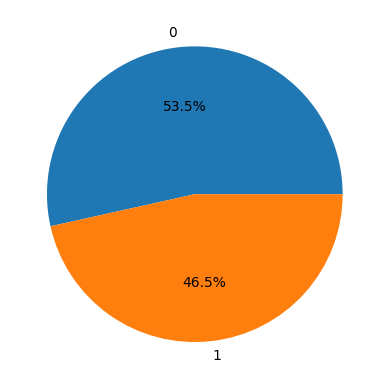

In [422]:
df_limpiezaL.loc[df_limpiezaL['¿Complicación?'] != "NHD", '¿Complicación?'] \
    .value_counts(normalize=True) \
    .plot.pie(autopct='%1.1f%%', ylabel='')

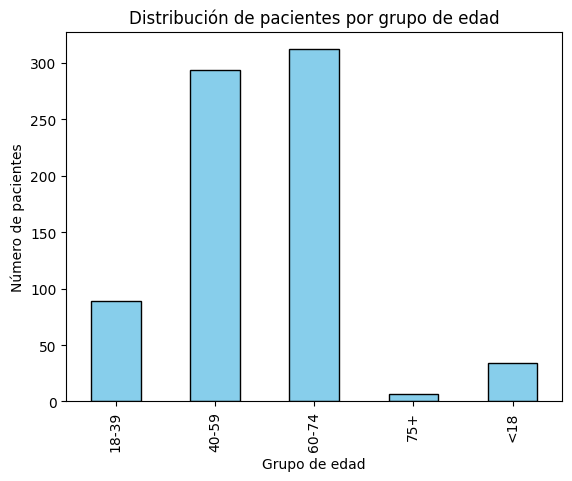

In [428]:
df_limpiezaL['Grupo_Edad'].value_counts().sort_index().plot.bar(
    color="skyblue", edgecolor="black"
)

plt.title("Distribución de pacientes por grupo de edad")
plt.xlabel("Grupo de edad")
plt.ylabel("Número de pacientes")
plt.show()

/tmp/ipython-input-1744334500.py:3: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  sexo = sexo.replace(mapa_sexo)


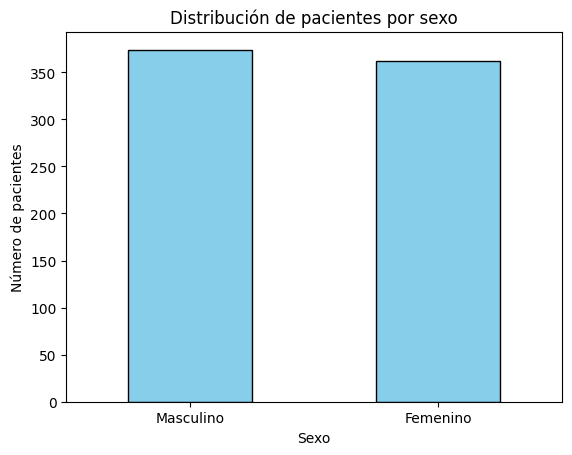

In [441]:
sexo = df_limpiezaL['Sexo_Receptor'].cat.remove_categories(['NHD'])
mapa_sexo = {1: "Masculino", 2: "Femenino"}
sexo = sexo.replace(mapa_sexo)
sexo.value_counts().plot.bar(color="skyblue", edgecolor="black")
plt.title("Distribución de pacientes por sexo")
plt.xlabel("Sexo")
plt.ylabel("Número de pacientes")
plt.xticks(rotation=0)
plt.show()

In [497]:
df_limpiezaL['Sexo_Receptor'].value_counts(normalize=True) * 100


,proportion
Sexo_Receptor,
1,50.815217
2,49.184783
NHD,0.000000


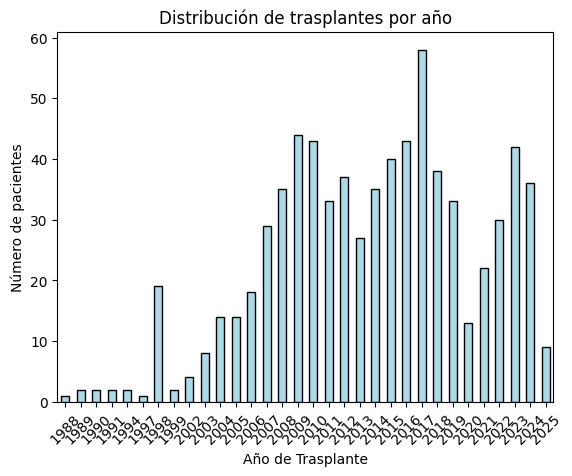

In [443]:
df_limpiezaL['Año_Tx'].value_counts().sort_index().plot.bar(
    color="lightblue", edgecolor="black"
)

plt.title("Distribución de trasplantes por año")
plt.xlabel("Año de Trasplante")
plt.ylabel("Número de pacientes")
plt.xticks(rotation=45)  # gira etiquetas si son muchos años
plt.show()

/tmp/ipython-input-28249279.py:40: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df_limpiezaL['EPS_nom'] = df_limpiezaL['EPS'].replace(mapa_eps)
/tmp/ipython-input-28249279.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpiezaL['EPS_nom'] = df_limpiezaL['EPS'].replace(mapa_eps)


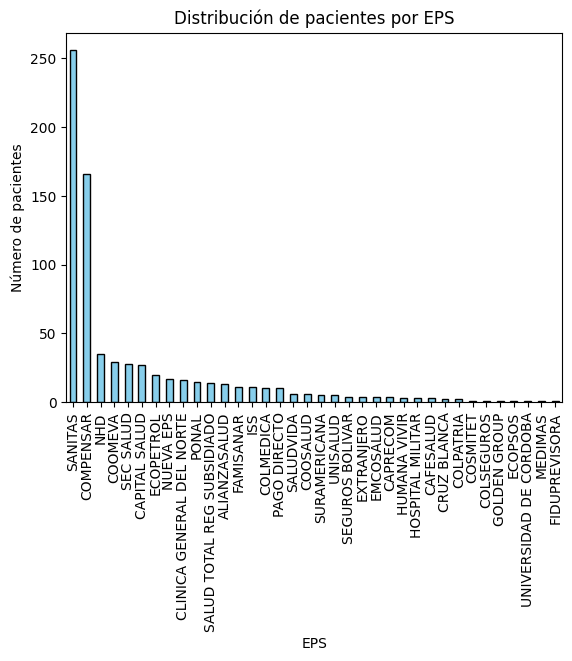

In [449]:
mapa_eps = {
    1.0: "COMPENSAR",
    2.0: "SANITAS",
    3.0: "FAMISANAR",
    4.0: "COOMEVA",
    5.0: "COLMEDICA",
    6.0: "SEC SALUD",
    7.0: "PONAL",
    8.0: "COLPATRIA",
    9.0: "EXTRANJERO",
    10.0: "ISS",
    11.0: "CRUZ BLANCA",
    12.0: "ECOPETROL",
    13.0: "UNISALUD",
    14.0: "CLINICA GENERAL DEL NORTE",
    15.0: "COSMITET",
    16.0: "HUMANA VIVIR",
    17.0: "PAGO DIRECTO",
    18.0: "COLSEGUROS",
    19.0: "SURAMERICANA",
    20.0: "NUEVA EPS",
    21.0: "HOSPITAL MILITAR",
    22.0: "SALUD TOTAL REG SUBSIDIADO",
    23.0: "ALIANZASALUD",
    24.0: "GOLDEN GROUP",
    25.0: "CAPITAL SALUD",
    26.0: "EMCOSALUD",
    27.0: "CAPRECOM",
    28.0: "SALUDVIDA",
    29.0: "SEGUROS BOLIVAR",
    30.0: "CAFESALUD",
    31.0: "UNIVERSIDAD DE CORDOBA",
    32.0: "ECOPSOS",
    33.0: "COOSALUD",
    34.0: "MEDIMAS",
    35.0: "ALLIANZ",
    36.0: "MEDPLUS",
    37.0: "FIDUPREVISORA",
}
df_limpiezaL['EPS_nom'] = df_limpiezaL['EPS'].replace(mapa_eps)
(df_limpiezaL['EPS_nom']
 .value_counts()
 .plot.bar(color="skyblue", edgecolor="black"))

plt.title("Distribución de pacientes por EPS")
plt.xlabel("EPS")
plt.ylabel("Número de pacientes")
plt.xticks(rotation=90)  # para leer mejor los nombres
plt.show()

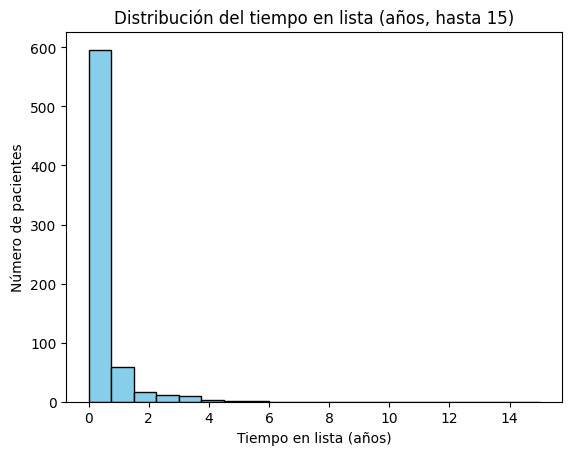

In [456]:
#La variable solo se gráfica hasta 15 años, porque tiene outliers muy grandes
df_limpiezaL['Tiempo_En_Lista_Años'].dropna().plot.hist(
    bins=20,
    range=(0, 15),   #límite del eje
    color="skyblue",
    edgecolor="black"
)
plt.title("Distribución del tiempo en lista (años, hasta 15)")
plt.xlabel("Tiempo en lista (años)")
plt.ylabel("Número de pacientes")
plt.show()


/tmp/ipython-input-2226725120.py:31: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df_limpiezaL['Causa1_nom'] = df_limpiezaL['Causa_1_Tx_Hepático_'].replace(mapa_causas)
/tmp/ipython-input-2226725120.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpiezaL['Causa1_nom'] = df_limpiezaL['Causa_1_Tx_Hepático_'].replace(mapa_causas)


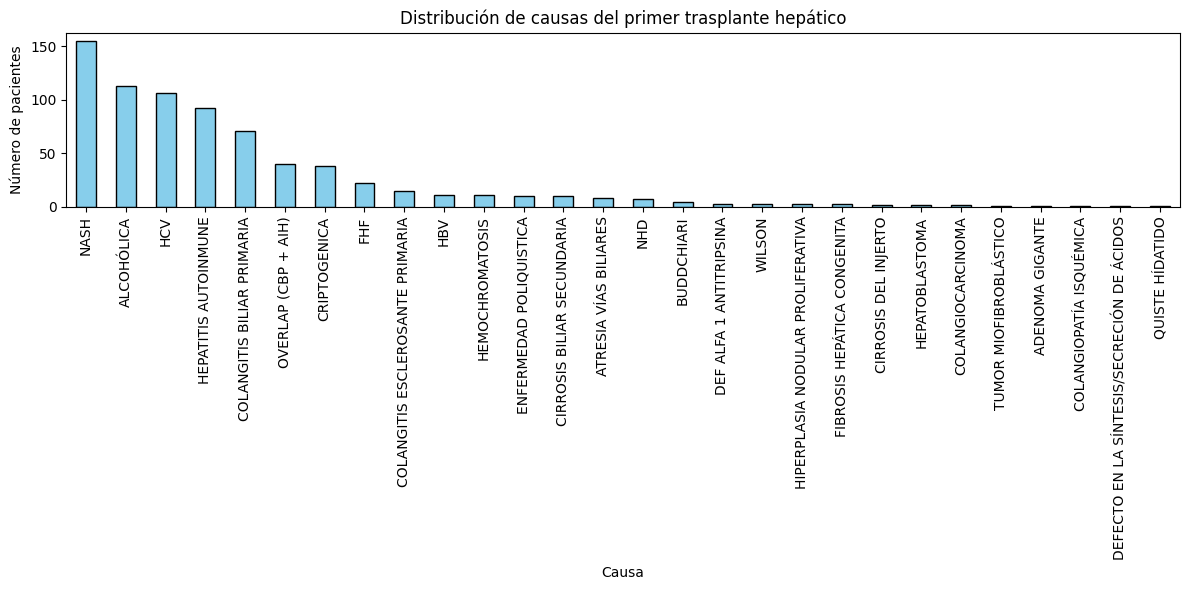

In [458]:
mapa_causas = {
    1: "HCV",
    2: "HBV",
    3: "NASH",
    4: "ALCOHÓLICA",
    5: "HEMOCHROMATOSIS",
    6: "DEF ALFA 1 ANTITRIPSINA",
    7: "WILSON",
    8: "HEPATITIS AUTOINMUNE",
    9: "COLANGITIS BILIAR PRIMARIA",
    10: "COLANGITIS ESCLEROSANTE PRIMARIA",
    11: "OVERLAP (CBP + AIH)",
    12: "CRIPTOGENICA",
    13: "FIBROSIS HEPÁTICA CONGENITA",
    14: "ATRESIA VÍAS BILIARES",
    15: "COLANGIOCARCINOMA",
    16: "TUMOR MIOFIBROBLÁSTICO",
    17: "HEPATOBLASTOMA",
    18: "ADENOMA GIGANTE",
    19: "HIPERPLASIA NODULAR PROLIFERATIVA",
    20: "ENFERMEDAD POLIQUISTICA",
    21: "BUDDCHIARI",
    22: "CIRROSIS BILIAR SECUNDARIA",
    23: "FHF",
    24: "HELLP",
    25: "CIRROSIS DEL INJERTO",
    26: "COLANGIOPATÍA ISQUÉMICA",
    27: "DEFECTO EN LA SÍNTESIS/SECRECIÓN DE ÁCIDOS",
    28: "QUISTE HÍDATIDO"
}
df_limpiezaL['Causa1_nom'] = df_limpiezaL['Causa_1_Tx_Hepático_'].replace(mapa_causas)
(df_limpiezaL['Causa1_nom']
 .value_counts()
 .plot.bar(color="skyblue", edgecolor="black", figsize=(12,6)))

plt.title("Distribución de causas del primer trasplante hepático")
plt.xlabel("Causa")
plt.ylabel("Número de pacientes")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [498]:
df_limpiezaL['Causa_1_Tx_Hepático_'].value_counts(normalize=True) * 100

,proportion
Causa_1_Tx_Hepático_,
3.0,21.059783
4.0,15.353261
1.0,14.402174
8.0,12.500000
9.0,9.646739
11.0,5.434783
12.0,5.163043
23.0,2.989130
10.0,2.038043


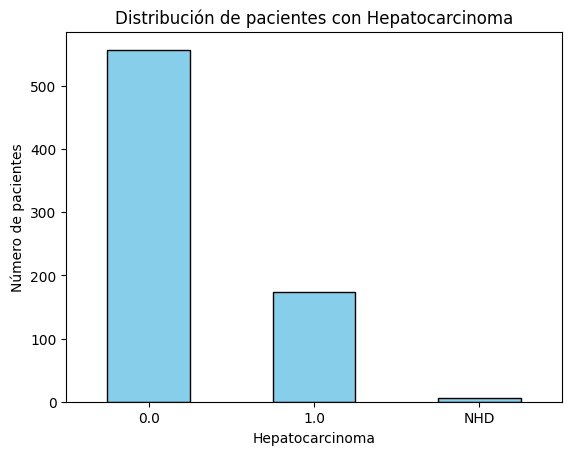

In [461]:
df_limpiezaL['Hepatocarcinoma'].value_counts().plot.bar(
    color="skyblue", edgecolor="black"
)
plt.title("Distribución de pacientes con Hepatocarcinoma")
plt.xlabel("Hepatocarcinoma")
plt.ylabel("Número de pacientes")
plt.xticks(rotation=0)  # etiquetas horizontales
plt.show()

#Análisis bivariado de acuerdo con la variable de complicaciones

/tmp/ipython-input-4121091456.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


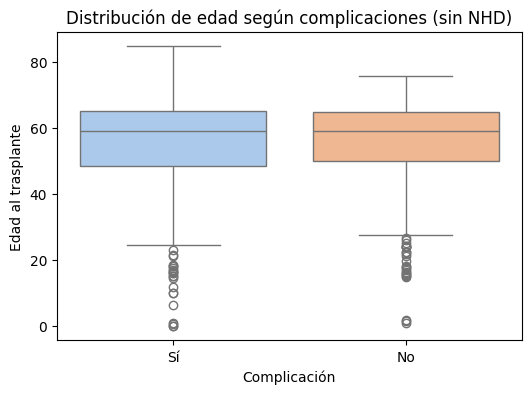

In [468]:
complicaciones = df_limpiezaL['¿Complicación?'].replace({0: "No", 1: "Sí"})
mask = complicaciones != "NHD"   #omitir NHD
plt.figure(figsize=(6,4))
sns.boxplot(
    x=complicaciones[mask],
    y=df_limpiezaL.loc[mask, "Edad_Al_Tx"],
    palette="pastel"
)
plt.title("Distribución de edad según complicaciones (sin NHD)")
plt.xlabel("Complicación")
plt.ylabel("Edad al trasplante")
plt.show()

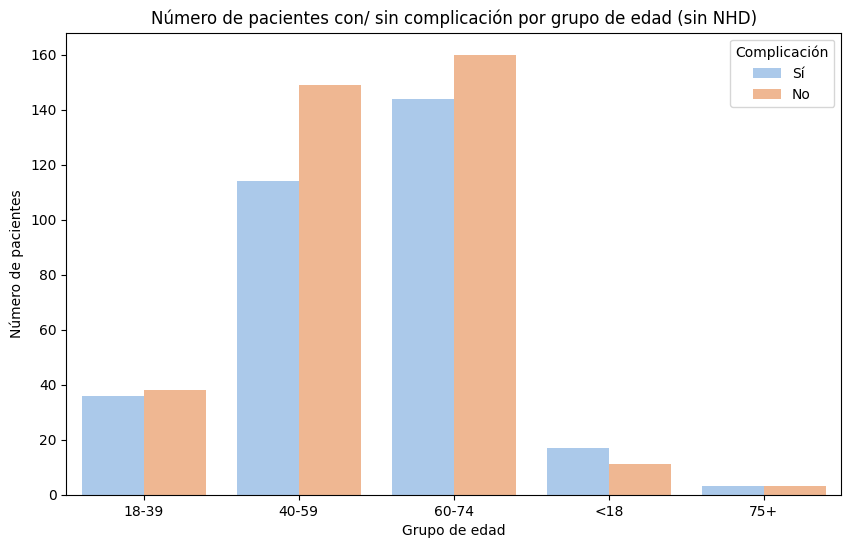

In [470]:
complicaciones1 = df_limpiezaL['¿Complicación?'].replace({0: "No", 1: "Sí"})
mask = complicaciones1 != "NHD"

plt.figure(figsize=(10,6))
sns.countplot(
    data=df_limpiezaL.loc[mask],
    x="Grupo_Edad",
    hue=complicaciones1[mask],  # Sí / No
    palette="pastel"
)

plt.title("Número de pacientes con/ sin complicación por grupo de edad (sin NHD)")
plt.xlabel("Grupo de edad")
plt.ylabel("Número de pacientes")
plt.legend(title="Complicación")
plt.show()

/tmp/ipython-input-2284303955.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  hepatocarcinoma_nom = df_limpiezaL['Hepatocarcinoma'].replace({0: "No", 1: "Sí"})


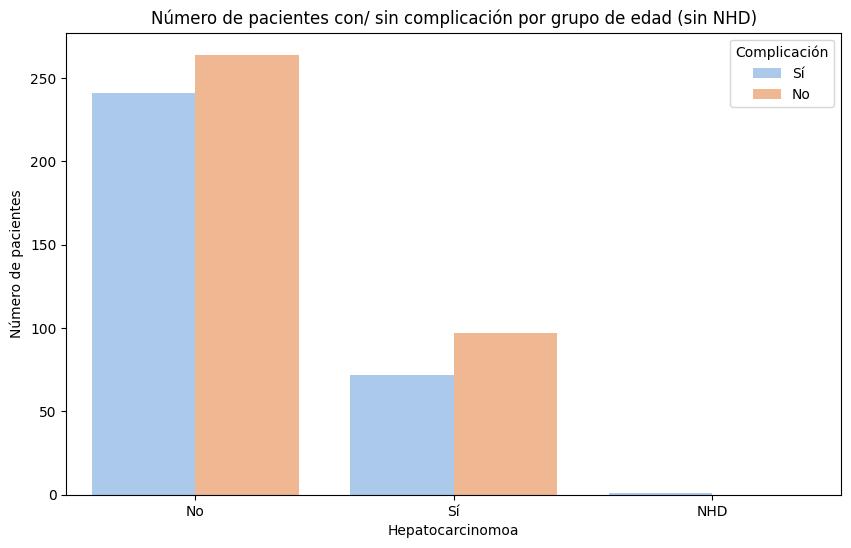

In [472]:
hepatocarcinoma_nom = df_limpiezaL['Hepatocarcinoma'].replace({0: "No", 1: "Sí"})
complicaciones2 = df_limpiezaL['¿Complicación?'].replace({0: "No", 1: "Sí"})
mask = complicaciones2 != "NHD"

plt.figure(figsize=(10,6))
sns.countplot(
    data=df_limpiezaL.loc[mask],
    x=hepatocarcinoma_nom[mask],
    hue=complicaciones1[mask],  # Sí / No
    palette="pastel"
)

plt.title("Número de pacientes con/ sin complicación por grupo de edad (sin NHD)")
plt.xlabel("Hepatocarcinomoa")
plt.ylabel("Número de pacientes")
plt.legend(title="Complicación")
plt.show()

/tmp/ipython-input-2632536123.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


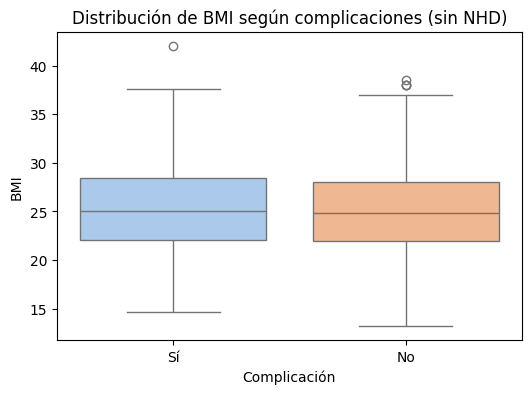

In [473]:
complicaciones = df_limpiezaL['¿Complicación?'].replace({0: "No", 1: "Sí"})
mask = complicaciones != "NHD"   #omitir NHD
plt.figure(figsize=(6,4))
sns.boxplot(
    x=complicaciones[mask],
    y=df_limpiezaL.loc[mask, "BMI"],
    palette="pastel"
)
plt.title("Distribución de BMI según complicaciones (sin NHD)")
plt.xlabel("Complicación")
plt.ylabel("BMI")
plt.show()

/tmp/ipython-input-1562663754.py:9: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  composicion = df_limpiezaL['Composición_Corporal'].replace(mapa_bmi)


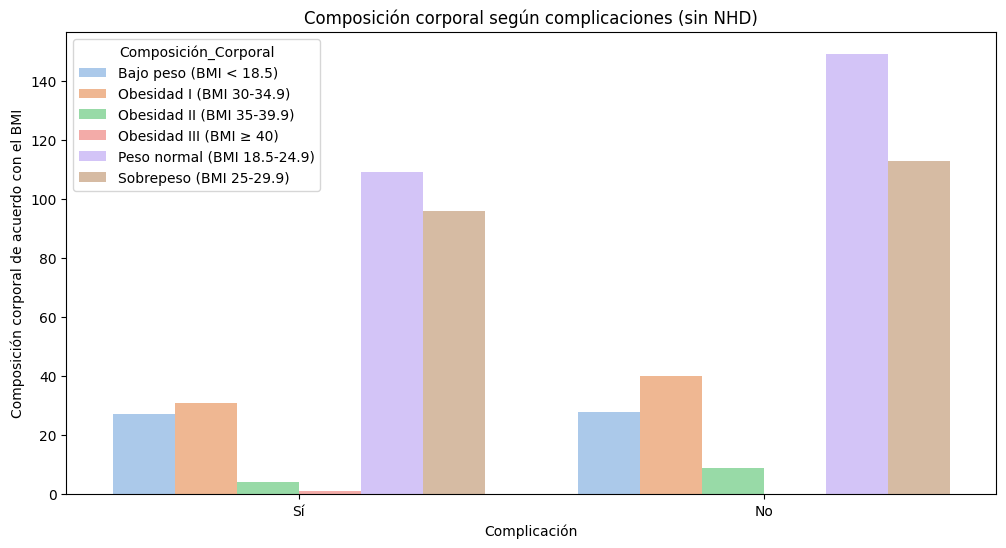

In [483]:
mapa_bmi = {
    0: "Bajo peso (BMI < 18.5)",
    1: "Peso normal (BMI 18.5-24.9)",
    2: "Sobrepeso (BMI 25-29.9)",
    3: "Obesidad I (BMI 30-34.9)",
    4: "Obesidad II (BMI 35-39.9)",
    5: "Obesidad III (BMI ≥ 40)"
}
composicion = df_limpiezaL['Composición_Corporal'].replace(mapa_bmi)
complicaciones = df_limpiezaL['¿Complicación?'].replace({0: "No", 1: "Sí"})
mask = (composicion != "NHD")
mask1 = (complicaciones != "NHD")
composicion = composicion.cat.remove_categories(["NHD"])
plt.figure(figsize=(12,6))
sns.countplot(
    x=complicaciones[mask1],
    hue=composicion[mask],
    palette="pastel",
    dodge=True
)
plt.title("Composición corporal según complicaciones (sin NHD)")
plt.xlabel("Complicación")
plt.ylabel("Composición corporal de acuerdo con el BMI")
plt.show()


/tmp/ipython-input-8689369.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  diabetes = df_limpiezaL['Diabetes_Mellitus_Pre_Tx'].replace({0: "No", 1: "Sí"})


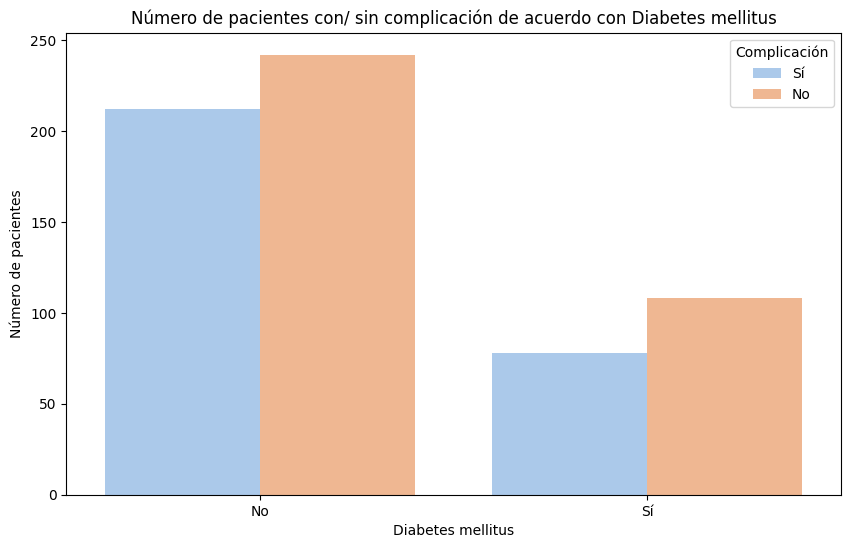

In [489]:
diabetes = df_limpiezaL['Diabetes_Mellitus_Pre_Tx'].replace({0: "No", 1: "Sí"})
complicaciones2 = df_limpiezaL['¿Complicación?'].replace({0: "No", 1: "Sí"})
mask = complicaciones2 != "NHD"
diabetes = diabetes.cat.remove_categories(["NHD"])

plt.figure(figsize=(10,6))
sns.countplot(
    data=df_limpiezaL.loc[mask],
    x=diabetes,
    hue=complicaciones2[mask],  # Sí / No
    palette="pastel"
)

plt.title("Número de pacientes con/ sin complicación de acuerdo con Diabetes mellitus")
plt.xlabel("Diabetes mellitus")
plt.ylabel("Número de pacientes")
plt.legend(title="Complicación")
plt.show()

/tmp/ipython-input-3489239298.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  hipertension = df_limpiezaL['Hipertensión_Arterial_Pre_Tx'].replace({0: "No", 1: "Sí"})


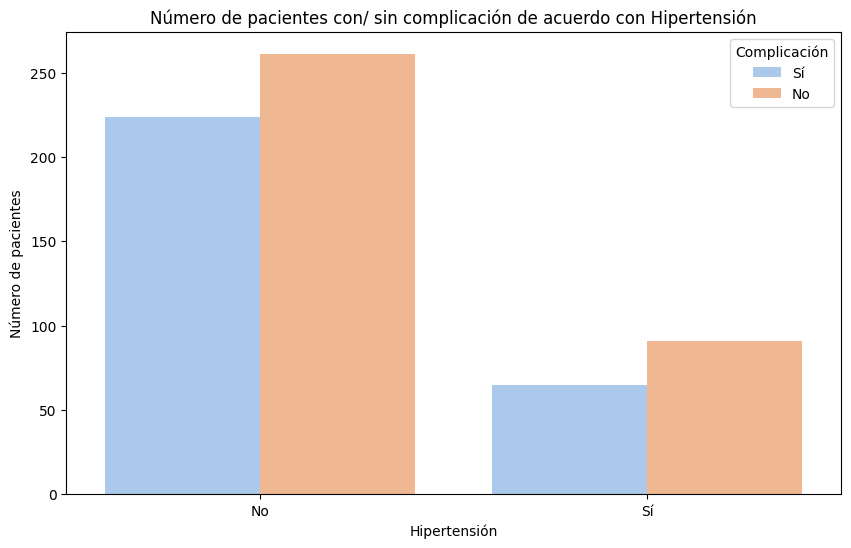

In [491]:
hipertension = df_limpiezaL['Hipertensión_Arterial_Pre_Tx'].replace({0: "No", 1: "Sí"})
complicaciones1 = df_limpiezaL['¿Complicación?'].replace({0: "No", 1: "Sí"})
mask = complicaciones1 != "NHD"
hipertension = hipertension.cat.remove_categories(["NHD"])

plt.figure(figsize=(10,6))
sns.countplot(
    data=df_limpiezaL.loc[mask],
    x=hipertension,
    hue=complicaciones1[mask],
    palette="pastel"
)

plt.title("Número de pacientes con/ sin complicación de acuerdo con Hipertensión")
plt.xlabel("Hipertensión")
plt.ylabel("Número de pacientes")
plt.legend(title="Complicación")
plt.show()

/tmp/ipython-input-731164701.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  tabaquismo = df_limpiezaL['Antecedente_De_Tabaquismo'].replace({0: "No", 1: "Sí"})


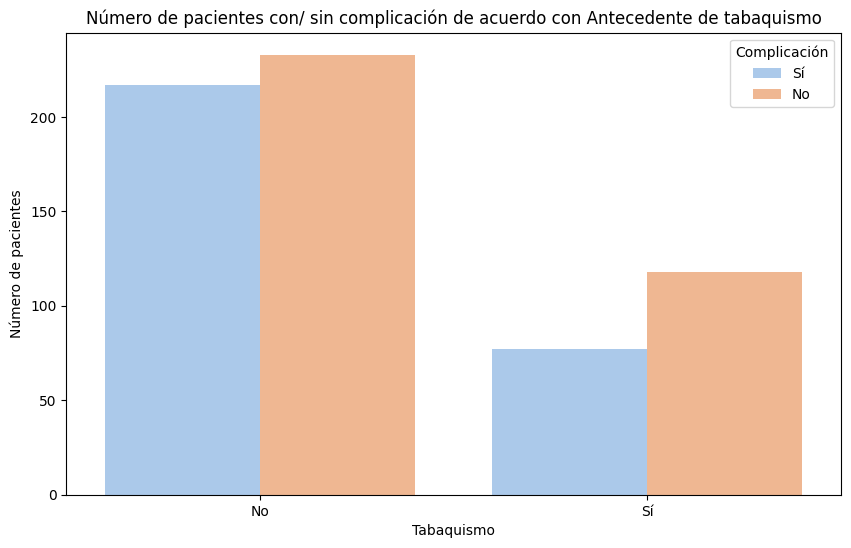

In [493]:
tabaquismo = df_limpiezaL['Antecedente_De_Tabaquismo'].replace({0: "No", 1: "Sí"})
complicaciones1 = df_limpiezaL['¿Complicación?'].replace({0: "No", 1: "Sí"})
mask = complicaciones1 != "NHD"
tabaquismo = tabaquismo.cat.remove_categories(["NHD"])

plt.figure(figsize=(10,6))
sns.countplot(
    data=df_limpiezaL.loc[mask],
    x=tabaquismo,
    hue=complicaciones1[mask],
    palette="pastel"
)

plt.title("Número de pacientes con/ sin complicación de acuerdo con Antecedente de tabaquismo")
plt.xlabel("Tabaquismo")
plt.ylabel("Número de pacientes")
plt.legend(title="Complicación")
plt.show()

/tmp/ipython-input-1418899867.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  alcoholismo = df_limpiezaL['Antecedente_De_Alcoholismo'].replace({0: "No", 1: "Sí"})


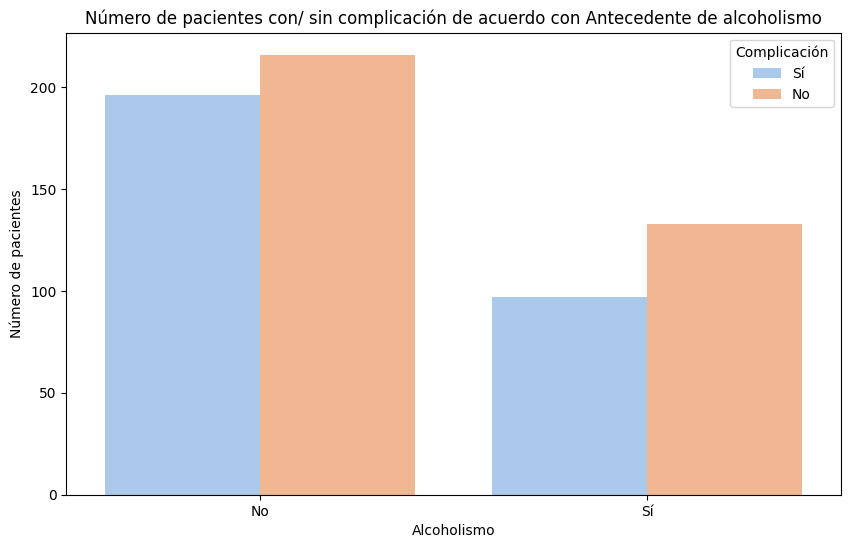

In [495]:
alcoholismo = df_limpiezaL['Antecedente_De_Alcoholismo'].replace({0: "No", 1: "Sí"})
complicaciones1 = df_limpiezaL['¿Complicación?'].replace({0: "No", 1: "Sí"})
mask = complicaciones1 != "NHD"
alcoholismo = alcoholismo.cat.remove_categories(["NHD"])

plt.figure(figsize=(10,6))
sns.countplot(
    data=df_limpiezaL.loc[mask],
    x=alcoholismo,
    hue=complicaciones1[mask],
    palette="pastel"
)

plt.title("Número de pacientes con/ sin complicación de acuerdo con Antecedente de alcoholismo")
plt.xlabel("Alcoholismo")
plt.ylabel("Número de pacientes")
plt.legend(title="Complicación")
plt.show()



/tmp/ipython-input-1419790630.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


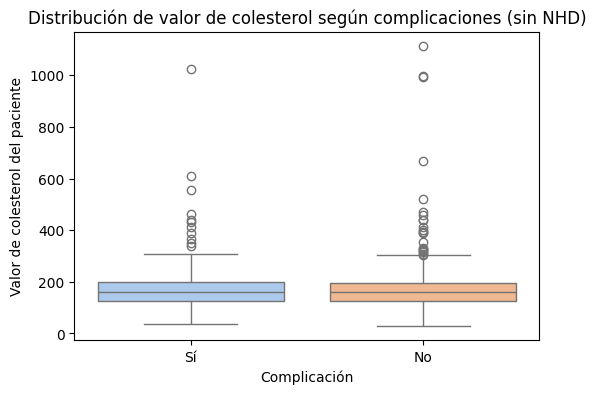

In [496]:
complicaciones = df_limpiezaL['¿Complicación?'].replace({0: "No", 1: "Sí"})
mask = complicaciones != "NHD"   #omitir NHD
plt.figure(figsize=(6,4))
sns.boxplot(
    x=complicaciones[mask],
    y=df_limpiezaL.loc[mask, "Colesterol_TotalPre_Tx"],
    palette="pastel"
)
plt.title("Distribución de valor de colesterol según complicaciones (sin NHD)")
plt.xlabel("Complicación")
plt.ylabel("Valor de colesterol del paciente")
plt.show()

In [494]:
df_limpiezaL['Antecedente_De_Alcoholismo'].value_counts()

,count
Antecedente_De_Alcoholismo,
0.0,422
1.0,232
NHD,82


#Chi2 con variables categoricas, se elimina el NHD de las categorias para hacer el análisis

In [502]:
y = df_limpiezaL['¿Complicación?'].astype(str).str.strip().str.upper()
mask_y = y != 'NHD'

cat_cols = df_limpiezaL.select_dtypes(include=['object','category','bool']).columns.tolist()
if '¿Complicación?' in cat_cols:
    cat_cols.remove('¿Complicación?')

resultados = []

for col in cat_cols:
    tabla = pd.crosstab(df_limpiezaL[col], y)
    chi2, p, dof, expected = stats.chi2_contingency(tabla)
    resultados.append({
        'variable': col,
        'chi2': chi2,
        'p_valor': p,
        'grados_libertad': dof
    })

tabla_resultados = pd.DataFrame(resultados).sort_values(by='p_valor')
print(tabla_resultados)

                        variable        chi2       p_valor  grados_libertad
14     Antecedente_De_Tabaquismo  342.954042  5.823812e-73                4
10   Enfermedad_Coronaria_Pre_Tx  330.117812  3.436292e-70                4
9          Falla_Cardiaca_Pre_Tx  326.195676  2.413302e-69                4
15    Antecedente_De_Alcoholismo  325.832002  2.891352e-69                4
13  Hipertensión_Arterial_Pre_Tx  323.016332  1.171574e-68                4
11       Infarto_Cardiaco_Pre_Tx  321.252295  2.814894e-68                4
12      Diabetes_Mellitus_Pre_Tx  317.451922  1.860229e-67                4
2                            EPS  428.056135  7.750193e-53               70
20                       EPS_nom  428.056135  7.750193e-53               70
16           Dislipidemia_Pre_Tx  247.172546  2.133059e-47               10
8           Composición_Corporal  220.229406  2.127289e-40               12
17         MDRD_Categórico_PreTx  176.818749  1.071392e-32               10
6           

#Se evalúa la normalidad de las variables cuantitativas del data set, para saber que prueba hacer

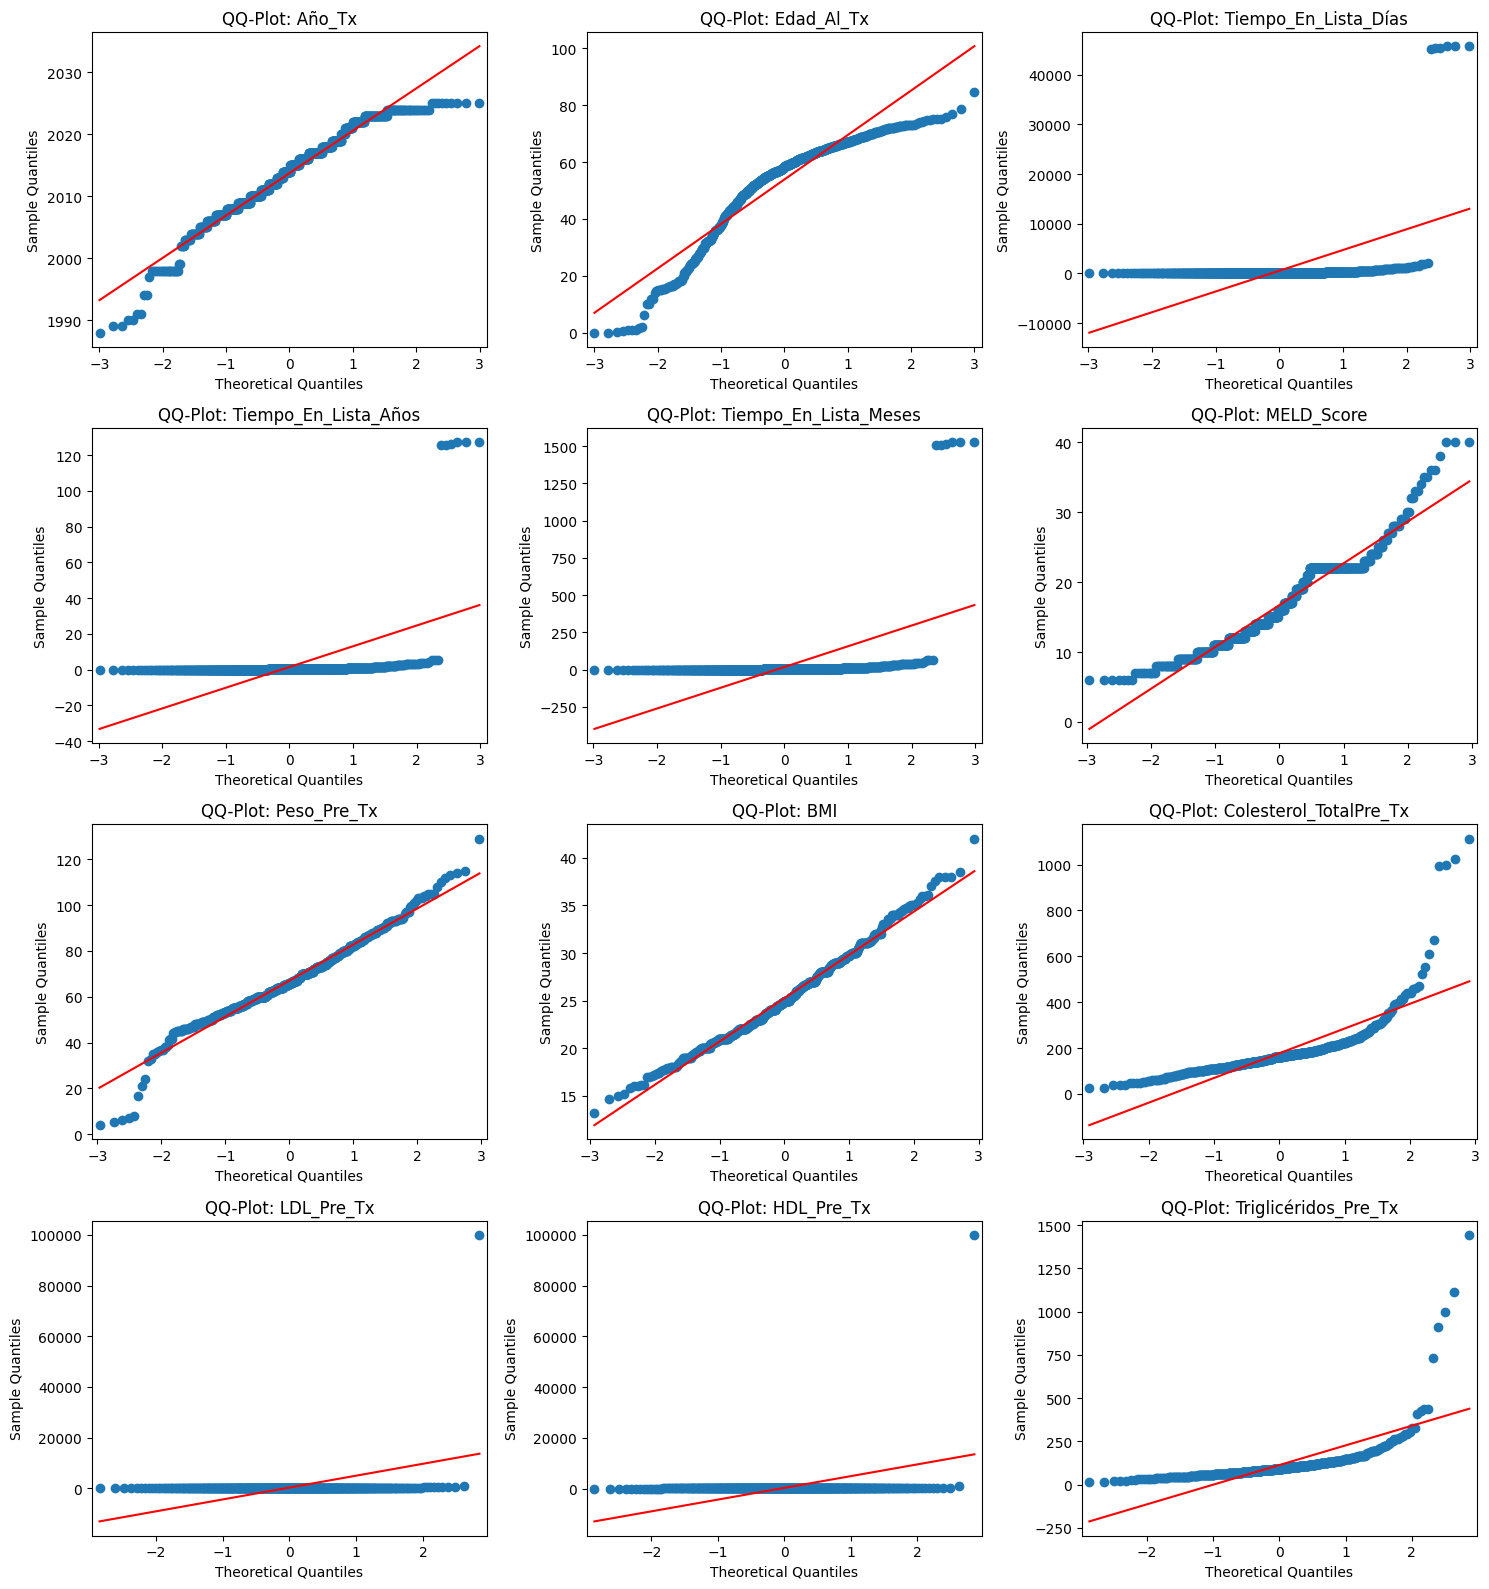

In [504]:
quant_vars = df_limpiezaL.select_dtypes(include=['int64', 'float64']).columns.tolist()
n = len(quant_vars)
ncols = 3
nrows = -(-n // ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, nrows*4))

for i, var in enumerate(quant_vars):
    row, col = divmod(i, ncols)
    ax = axes[row, col] if nrows > 1 else axes[col]
    sm.qqplot(df_limpiezaL[var].dropna(), line='s', ax=ax)
    ax.set_title(f"QQ-Plot: {var}")

# Quitar subplots vacíos si los hay
for j in range(i+1, nrows*ncols):
    row, col = divmod(j, ncols)
    fig.delaxes(axes[row, col] if nrows > 1 else axes[col])

plt.tight_layout()
plt.show()

#La mayoria de variables son no normales, dado esto, se va a aplicar el test de U-Mann Whitney

In [505]:
from scipy.stats import mannwhitneyu
quant_vars =df_limpiezaL.select_dtypes(include=['int64','float64']).columns.tolist()

resultados = []

for var in quant_vars:
    grupo0 = df_limpiezaL[df_limpiezaL['¿Complicación?'] == 0][var].dropna()
    grupo1 = df_limpiezaL[df_limpiezaL['¿Complicación?'] == 1][var].dropna()

    try:
        stat, p = mannwhitneyu(grupo0, grupo1, alternative="two-sided")
        resultados.append({
            "Variable": var,
            "Mediana_No_Cancelado": grupo0.median(),
            "Mediana_Cancelado": grupo1.median(),
            "U_statistic": stat,
            "p_value": p
        })
    except Exception as e:
        print(f"❌ Error en {var}: {e}")

# Crear tabla final
tabla_resultados = pd.DataFrame(resultados)
from IPython.display import display
display(tabla_resultados)

,Variable,Mediana_No_Cancelado,Mediana_Cancelado,U_statistic,p_value
0,Año_Tx,2015.000000,2014.000000,60472.5,0.132588
1,Edad_Al_Tx,59.000000,59.145205,57582.0,0.720390
2,Tiempo_En_Lista_Días,60.000000,52.500000,58371.0,0.502724
3,Tiempo_En_Lista_Años,0.166667,0.145833,58371.0,0.502724
4,Tiempo_En_Lista_Meses,2.000000,1.750000,58371.0,0.502724
5,MELD_Score,15.500000,16.000000,48776.5,0.700821
6,Peso_Pre_Tx,65.500000,66.000000,54152.5,0.796404
7,BMI,24.800000,25.000000,40405.5,0.522638
8,Colesterol_TotalPre_Tx,161.000000,161.500000,35648.0,0.860062
9,LDL_Pre_Tx,99.000000,96.000000,23807.0,0.791433
